
📊 Loading Excel file: F:\tesla-optimus-business-analysis\data\processed\Tesla_All_Sheets_Scenarios.xlsx
✅ Successfully loaded. Found 6 sheets:
  1. All_2030业务结构预测
  2. All_最终合并预测
  3. All_新增业务预测
  4. All_传统业务预测
  5. All_各地区收入预测
  6. CAGR_Analysis

📁 Output directory created: tesla_regional_analysis_no_totals

🚀 STARTING REGIONAL REVENUE ANALYSIS (EXCLUDING TOTALS)

🔄 Processing sheet 1/6: All_2030业务结构预测

🌍 Regional Revenue Analysis - Sheet 1: All_2030业务结构预测
Data shape: (18, 4)

⚠️ No regional or revenue columns found in All_2030业务结构预测

🔄 Processing sheet 2/6: All_最终合并预测

🌍 Regional Revenue Analysis - Sheet 2: All_最终合并预测
Data shape: (27, 6)

⚠️ No regional or revenue columns found in All_最终合并预测

🔄 Processing sheet 3/6: All_新增业务预测

🌍 Regional Revenue Analysis - Sheet 3: All_新增业务预测
Data shape: (27, 5)

⚠️ No regional or revenue columns found in All_新增业务预测

🔄 Processing sheet 4/6: All_传统业务预测

🌍 Regional Revenue Analysis - Sheet 4: All_传统业务预测
Data shape: (27, 6)

⚠️ No regional or revenue 

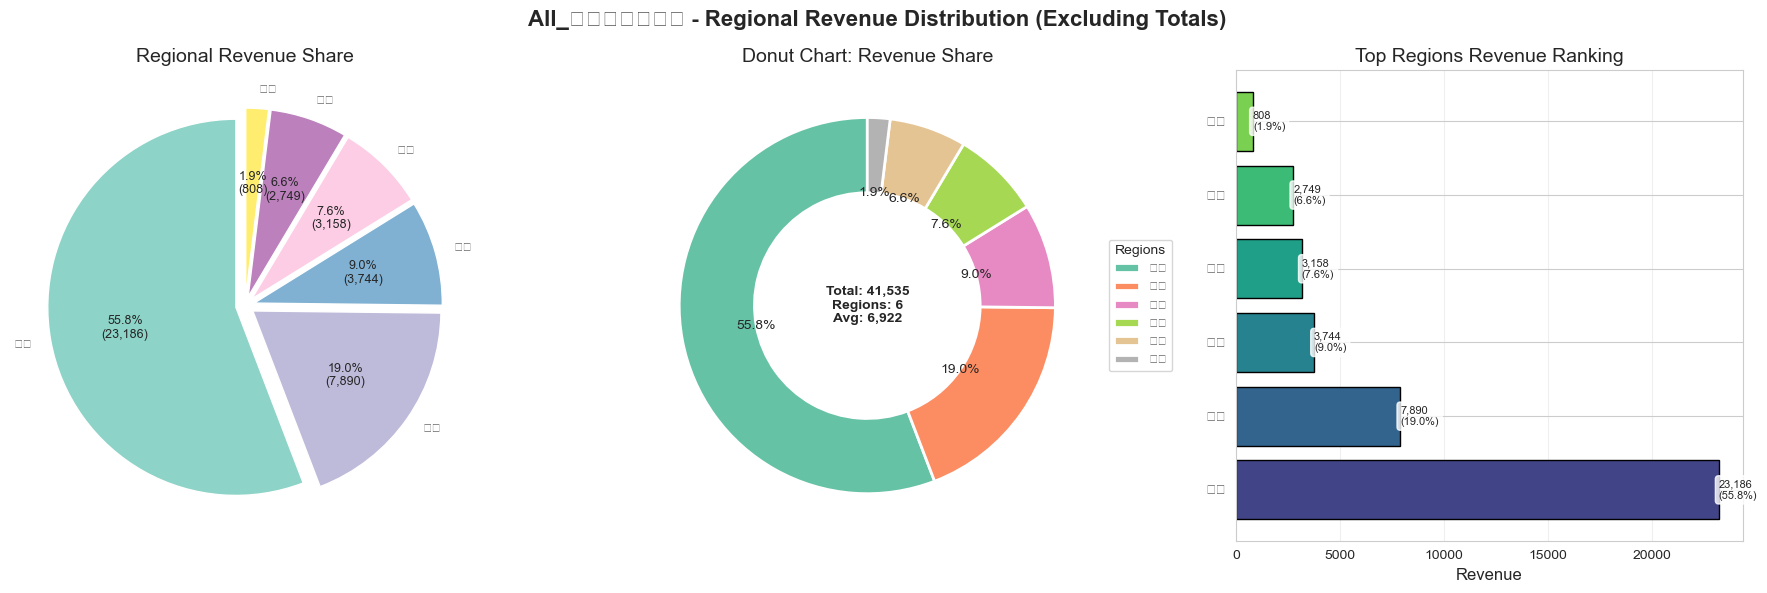


    📊 Regional Revenue Statistics (Excluding Totals):
------------------------------------------------------------
 Rank Region Revenue Share % Cumulative %
    1     美国  23,186   55.8%        55.8%
    2     中国   7,890   19.0%        74.8%
    3     欧洲   3,744    9.0%        83.8%
    4     其他   3,158    7.6%        91.4%
    5     亚太   2,749    6.6%        98.1%
    6     中东     808    1.9%       100.0%

    📈 Market Concentration Analysis:
      Top 1 region share: 55.8%
      Top 3 regions share: 83.8%
      Top 5 regions share: 98.1%
      HHI Index (simplified): 3664
      Market Concentration: Highly Concentrated

    📊 Creating Bar Charts (Excluding Totals)...
    ✅ Bar charts saved to: tesla_regional_analysis_no_totals\All_各地区收入预测_regional_bars_no_totals.png


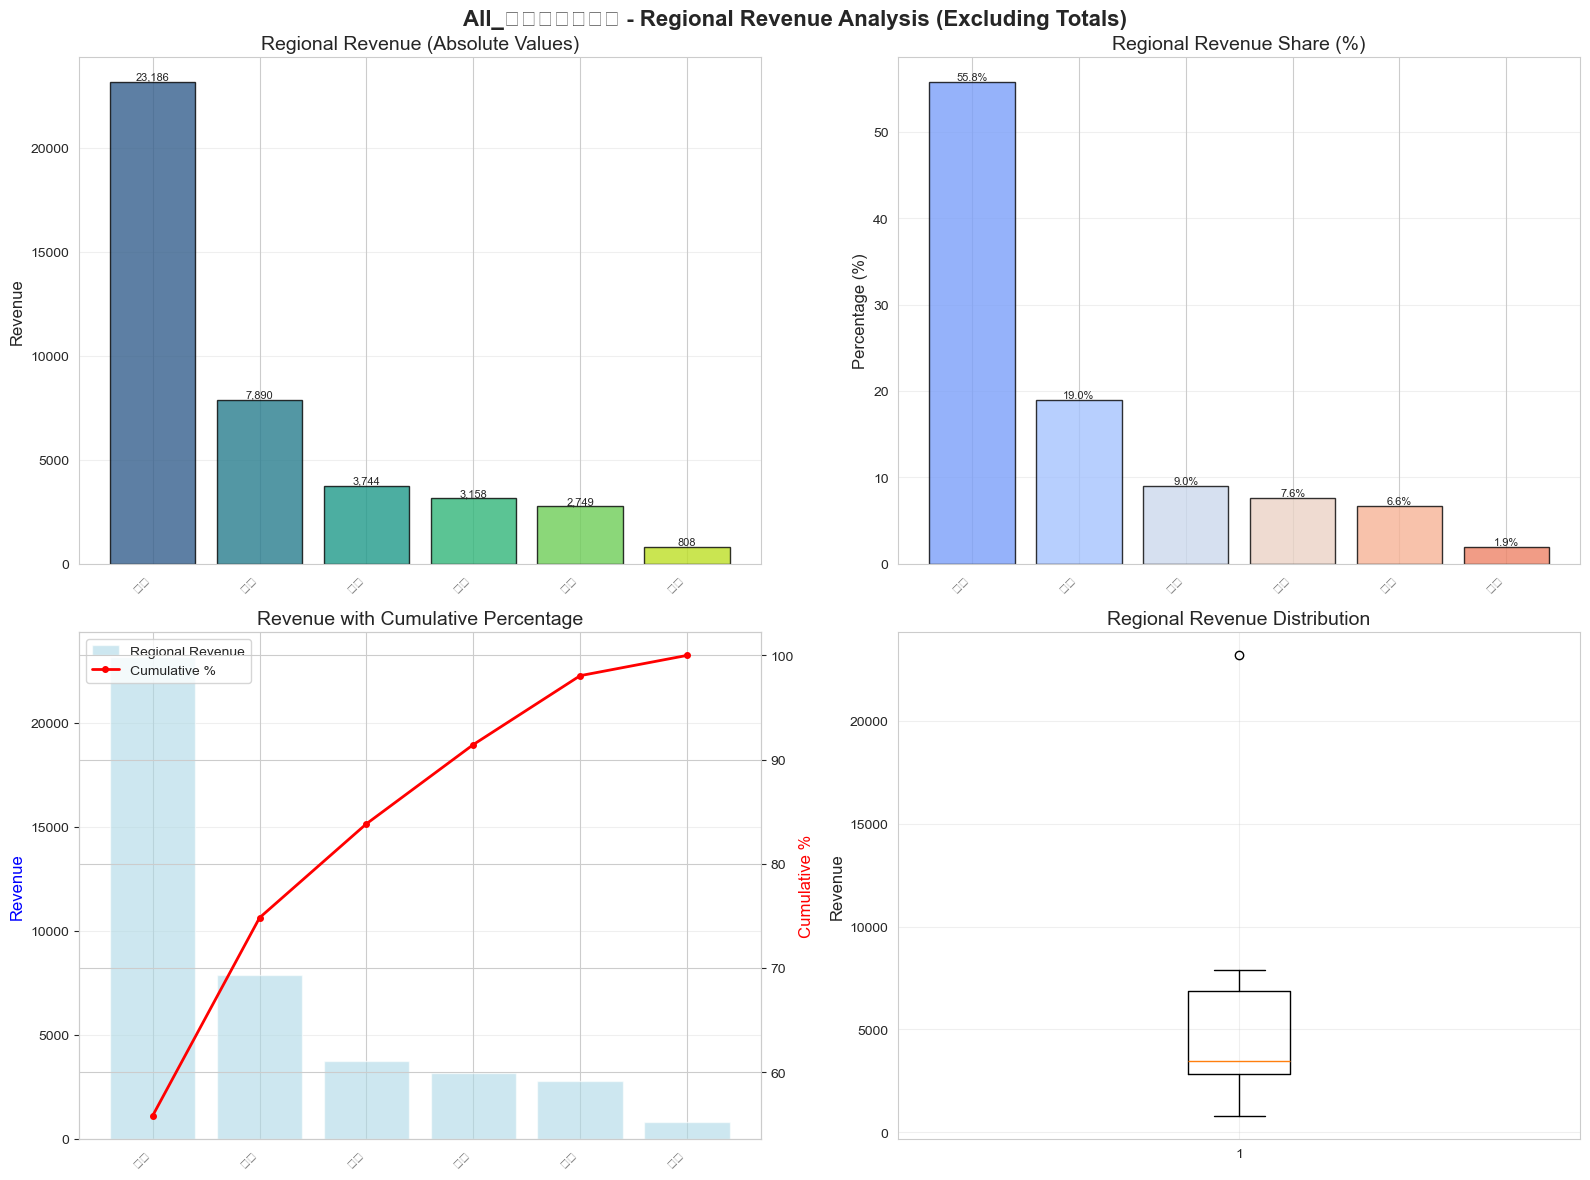


    📊 Creating Regional Comparison Matrix...
    ✅ Comparison matrix saved to: tesla_regional_analysis_no_totals\All_各地区收入预测_regional_comparison.png


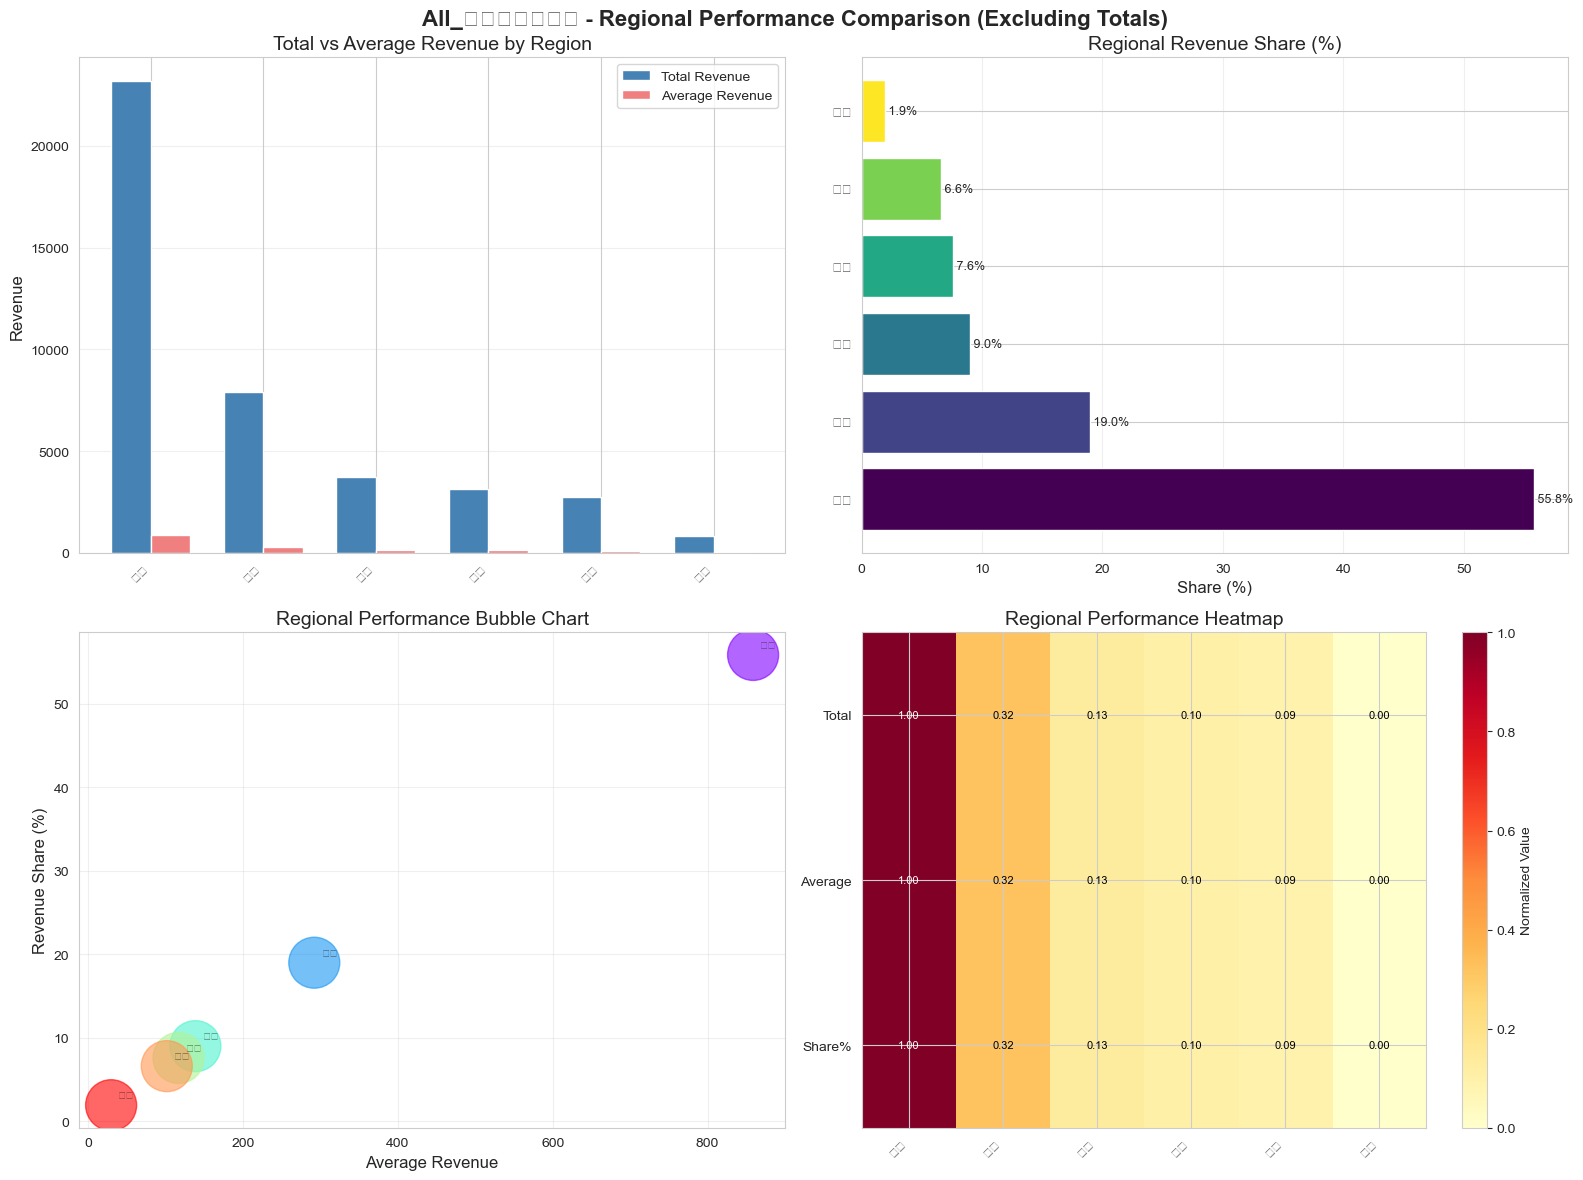


    📊 Detailed Regional Performance Metrics:
----------------------------------------------------------------------
     Total Average  Count Share%
地区                              
美国  23,186     859     27  55.8%
中国   7,890     292     27  19.0%
欧洲   3,744     139     27   9.0%
其他   3,158     117     27   7.6%
亚太   2,749     102     27   6.6%
中东     808      30     27   1.9%

🎉 Regional analysis completed successfully for All_各地区收入预测

🔄 Processing sheet 6/6: CAGR_Analysis

🌍 Regional Revenue Analysis - Sheet 6: CAGR_Analysis
Data shape: (12, 10)

⚠️ No regional or revenue columns found in CAGR_Analysis

📋 REGIONAL ANALYSIS SUMMARY (EXCLUDING TOTALS)

Summary of Regional Analysis:
         Sheet  Rows  Columns  Has_Regional_Data  Regional_Columns  Revenue_Columns  Analysis_Success
All_2030业务结构预测    18        4              False                 0                1             False
    All_最终合并预测    27        6              False                 0                1             False
  

In [3]:
# Tesla Regional Revenue Analysis - Excluding Totals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set Chinese font support
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# Define file path
file_path = r"F:\tesla-optimus-business-analysis\data\processed\Tesla_All_Sheets_Scenarios.xlsx"

# Check if file exists
if not os.path.exists(file_path):
    print(f"❌ File not found: {file_path}")
    alt_paths = [
        r"Tesla_All_Sheets_Scenarios.xlsx",
        r"./Tesla_All_Sheets_Scenarios.xlsx",
        r"./data/Tesla_All_Sheets_Scenarios.xlsx"
    ]
    
    for path in alt_paths:
        if os.path.exists(path):
            file_path = path
            print(f"✅ Found file at: {path}")
            break
    
    if not os.path.exists(file_path):
        user_path = input("📁 Please enter the full path to your Excel file: ")
        if os.path.exists(user_path):
            file_path = user_path
        else:
            print("❌ File not found. Exiting...")
            exit()

print(f"\n📊 Loading Excel file: {file_path}")

# Load the Excel file
try:
    xls = pd.ExcelFile(file_path)
    sheets = xls.sheet_names
    print(f"✅ Successfully loaded. Found {len(sheets)} sheets:")
    
    for i, sheet in enumerate(sheets, 1):
        print(f"  {i}. {sheet}")
        
except Exception as e:
    print(f"❌ Error loading file: {e}")
    exit()

# Create output directory
output_dir = "tesla_regional_analysis_no_totals"
os.makedirs(output_dir, exist_ok=True)
print(f"\n📁 Output directory created: {output_dir}")

def identify_regional_columns(df):
    """识别地区相关列"""
    regional_keywords = ['地区', '区域', '国家', '省份', '城市', '大区', 
                        'region', 'area', 'country', 'province', 'city', 
                        'zone', 'territory', 'location', 'market']
    
    revenue_keywords = ['收入', '营收', '销售额', 'revenue', 'sales', 
                       'turnover', 'income', 'earnings']
    
    regional_cols = []
    revenue_cols = []
    
    for col in df.columns:
        col_str = str(col).lower()
        
        # 检查是否是地区列
        if any(keyword in col_str for keyword in regional_keywords):
            regional_cols.append(col)
        
        # 检查是否是收入列
        if any(keyword in col_str for keyword in revenue_keywords):
            revenue_cols.append(col)
    
    return regional_cols, revenue_cols

def exclude_totals_from_data(df, region_col):
    """排除总计、合计、总计等汇总行"""
    if region_col is None:
        return df
    
    # 定义需要排除的总计关键词（中英文）
    total_keywords = [
        # 中文总计关键词
        '总计', '合计', '总和', '总量', '总数', '总额', '总', '全部', '整体', '全国',
        '全球', '全公司', '全地区', '各地区总计', '区域总计', '地区合计',
        # 英文总计关键词
        'total', 'sum', 'overall', 'grand total', 'aggregate', 'all', 'overview',
        'summary', 'consolidated', 'combined', 'overall total'
    ]
    
    # 创建排除掩码
    mask = pd.Series(True, index=df.index)
    
    if region_col in df.columns:
        for keyword in total_keywords:
            # 检查地区列是否包含总计关键词（不区分大小写）
            mask = mask & ~df[region_col].astype(str).str.lower().str.contains(keyword.lower())
        
        # 也排除空值
        mask = mask & df[region_col].notna()
    
    # 应用排除
    filtered_df = df[mask].copy()
    
    # 打印排除信息
    excluded_count = len(df) - len(filtered_df)
    if excluded_count > 0:
        print(f"    ⚠️ Excluded {excluded_count} rows containing totals/summaries")
        if region_col in df.columns:
            excluded_values = df[~mask][region_col].unique()[:5]  # 显示前5个被排除的值
            print(f"    Excluded values: {excluded_values.tolist()}")
    
    return filtered_df

def create_regional_pie_charts(df, region_col, revenue_col, sheet_name):
    """创建地区收入饼图组 - 排除总计"""
    print(f"\n  🥧 Creating Pie Charts for Regional Revenue (Excluding Totals)...")
    
    # 排除总计行
    filtered_df = exclude_totals_from_data(df, region_col)
    
    if len(filtered_df) == 0:
        print("    ⚠️ No data remaining after excluding totals")
        return
    
    # 按地区汇总收入
    regional_revenue = filtered_df.groupby(region_col)[revenue_col].sum().sort_values(ascending=False)
    
    if len(regional_revenue) == 0:
        print("    ⚠️ No regional revenue data to visualize")
        return
    
    # 过滤掉收入为0的地区
    regional_revenue = regional_revenue[regional_revenue > 0]
    
    if len(regional_revenue) == 0:
        print("    ⚠️ All regional revenues are zero")
        return
    
    print(f"    📊 Regions analyzed: {len(regional_revenue)}")
    
    # 创建安全的文件名
    safe_name = sheet_name.replace('/', '_').replace('\\', '_').replace(':', '_')
    
    # 创建3种饼图变体
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'{sheet_name} - Regional Revenue Distribution (Excluding Totals)', 
                fontsize=16, fontweight='bold')
    
    # 1. 传统饼图
    ax1 = axes[0]
    
    # 如果地区太多，只显示前8个，其他合并为"其他"
    if len(regional_revenue) > 8:
        top_regions = regional_revenue.head(8)
        other_revenue = regional_revenue[8:].sum()
        
        if other_revenue > 0:
            pie_data = pd.concat([top_regions, pd.Series({'其他地区': other_revenue})])
        else:
            pie_data = top_regions
    else:
        pie_data = regional_revenue
    
    wedges1, texts1, autotexts1 = ax1.pie(
        pie_data.values, 
        labels=pie_data.index,
        autopct=lambda pct: f'{pct:.1f}%\n({pct*sum(pie_data.values)/100:,.0f})',
        startangle=90,
        explode=[0.05] * len(pie_data),
        colors=plt.cm.Set3(np.linspace(0, 1, len(pie_data))),
        textprops={'fontsize': 9}
    )
    ax1.set_title('Regional Revenue Share', fontsize=14)
    
    # 2. 环形图 - 只显示主要地区
    ax2 = axes[1]
    
    # 显示前6个地区
    if len(regional_revenue) > 6:
        donut_data = regional_revenue.head(6)
        other_revenue_donut = regional_revenue[6:].sum()
        if other_revenue_donut > 0:
            donut_data = pd.concat([donut_data, pd.Series({'其他地区': other_revenue_donut})])
    else:
        donut_data = regional_revenue
    
    wedges2, texts2, autotexts2 = ax2.pie(
        donut_data.values,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set2(np.linspace(0, 1, len(donut_data))),
        wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2)
    )
    ax2.set_title('Donut Chart: Revenue Share', fontsize=14)
    
    # 在中心添加统计信息
    total_filtered_revenue = regional_revenue.sum()
    num_regions = len(regional_revenue)
    avg_revenue = total_filtered_revenue / num_regions if num_regions > 0 else 0
    
    center_text = f'Total: {total_filtered_revenue:,.0f}\n'
    center_text += f'Regions: {num_regions}\n'
    center_text += f'Avg: {avg_revenue:,.0f}'
    
    ax2.text(0, 0, center_text, 
             ha='center', va='center', fontsize=10, fontweight='bold')
    
    # 添加图例
    ax2.legend(wedges2, donut_data.index, title="Regions", 
              loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)
    
    # 3. 地区收入排名柱状图
    ax3 = axes[2]
    
    # 显示前10个地区
    display_data = regional_revenue.head(10)
    
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(display_data)))
    bars = ax3.barh(range(len(display_data)), display_data.values,
                   color=colors, edgecolor='black')
    
    ax3.set_yticks(range(len(display_data)))
    ax3.set_yticklabels(display_data.index)
    ax3.set_xlabel('Revenue', fontsize=12)
    ax3.set_title('Top Regions Revenue Ranking', fontsize=14)
    ax3.grid(True, alpha=0.3, axis='x')
    
    # 在柱状图上添加数值标签
    for i, (bar, value) in enumerate(zip(bars, display_data.values)):
        # 计算百分比
        percentage = (value / total_filtered_revenue * 100)
        label_text = f'{value:,.0f}\n({percentage:.1f}%)'
        
        ax3.text(value, bar.get_y() + bar.get_height()/2,
                label_text, va='center', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    
    # 保存饼图组
    pie_path = os.path.join(output_dir, f'{safe_name}_regional_pie_no_totals.png')
    plt.savefig(pie_path, dpi=150, bbox_inches='tight')
    print(f"    ✅ Pie charts saved to: {pie_path}")
    plt.show()
    
    # 显示地区收入详细统计表
    print(f"\n    📊 Regional Revenue Statistics (Excluding Totals):")
    print("-" * 60)
    
    stats_data = []
    for i, (region, revenue) in enumerate(regional_revenue.head(15).items(), 1):
        percentage = (revenue / total_filtered_revenue * 100)
        cumulative = regional_revenue.head(i).sum()
        cumulative_percent = (cumulative / total_filtered_revenue * 100)
        
        stats_data.append({
            'Rank': i,
            'Region': region,
            'Revenue': f'{revenue:,.0f}',
            'Share %': f'{percentage:.1f}%',
            'Cumulative %': f'{cumulative_percent:.1f}%'
        })
    
    if stats_data:
        stats_df = pd.DataFrame(stats_data)
        print(stats_df.to_string(index=False))
    
    # 计算市场集中度指标
    print(f"\n    📈 Market Concentration Analysis:")
    if len(regional_revenue) >= 3:
        top1_share = (regional_revenue.iloc[0] / total_filtered_revenue * 100)
        top3_share = (regional_revenue.iloc[:3].sum() / total_filtered_revenue * 100)
        top5_share = (regional_revenue.iloc[:5].sum() / total_filtered_revenue * 100)
        
        print(f"      Top 1 region share: {top1_share:.1f}%")
        print(f"      Top 3 regions share: {top3_share:.1f}%")
        print(f"      Top 5 regions share: {top5_share:.1f}%")
        
        # 计算赫芬达尔指数（简化版）
        hhi = sum((revenue / total_filtered_revenue * 100) ** 2 for revenue in regional_revenue.values)
        print(f"      HHI Index (simplified): {hhi:.0f}")
        
        # 市场集中度评估
        if hhi > 2500:
            concentration = "Highly Concentrated"
        elif hhi > 1500:
            concentration = "Moderately Concentrated"
        else:
            concentration = "Competitive"
        
        print(f"      Market Concentration: {concentration}")

def create_regional_bar_charts_no_totals(df, region_col, revenue_col, sheet_name):
    """创建地区收入柱状图组 - 排除总计"""
    print(f"\n    📊 Creating Bar Charts (Excluding Totals)...")
    
    # 排除总计行
    filtered_df = exclude_totals_from_data(df, region_col)
    
    if len(filtered_df) == 0:
        return
    
    # 按地区汇总收入
    regional_revenue = filtered_df.groupby(region_col)[revenue_col].sum().sort_values(ascending=False)
    
    if len(regional_revenue) == 0:
        return
    
    # 只显示非零收入地区
    regional_revenue = regional_revenue[regional_revenue > 0]
    
    if len(regional_revenue) == 0:
        return
    
    # 限制显示的地区数量
    max_display = 15
    if len(regional_revenue) > max_display:
        display_data = regional_revenue.head(max_display)
        print(f"    Showing top {max_display} regions out of {len(regional_revenue)}")
    else:
        display_data = regional_revenue
    
    safe_name = sheet_name.replace('/', '_').replace('\\', '_')
    total_revenue = regional_revenue.sum()
    
    # 创建多种柱状图
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{sheet_name} - Regional Revenue Analysis (Excluding Totals)', 
                fontsize=16, fontweight='bold')
    
    # 1. 收入绝对值柱状图
    ax1 = axes[0, 0]
    colors1 = plt.cm.viridis(np.linspace(0.3, 0.9, len(display_data)))
    bars1 = ax1.bar(range(len(display_data)), display_data.values,
                   color=colors1, edgecolor='black', alpha=0.8)
    
    ax1.set_title('Regional Revenue (Absolute Values)', fontsize=14)
    ax1.set_xticks(range(len(display_data)))
    ax1.set_xticklabels(display_data.index, rotation=45, ha='right', fontsize=9)
    ax1.set_ylabel('Revenue', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 添加数值标签
    for bar in bars1:
        height = bar.get_height()
        if height > 0:  # 只对非零值添加标签
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:,.0f}', ha='center', va='bottom', 
                    fontsize=8, rotation=0)
    
    # 2. 收入占比柱状图
    ax2 = axes[0, 1]
    percentages = (display_data.values / total_revenue * 100)
    colors2 = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(display_data)))
    bars2 = ax2.bar(range(len(display_data)), percentages,
                   color=colors2, edgecolor='black', alpha=0.8)
    
    ax2.set_title('Regional Revenue Share (%)', fontsize=14)
    ax2.set_xticks(range(len(display_data)))
    ax2.set_xticklabels(display_data.index, rotation=45, ha='right', fontsize=9)
    ax2.set_ylabel('Percentage (%)', fontsize=12)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 添加百分比标签
    for bar, pct in zip(bars2, percentages):
        height = bar.get_height()
        if height > 0.5:  # 只对显著百分比添加标签
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{pct:.1f}%', ha='center', va='bottom', 
                    fontsize=8, rotation=0)
    
    # 3. 累计收入占比图
    ax3 = axes[1, 0]
    cumulative = display_data.cumsum()
    cumulative_pct = (cumulative / total_revenue * 100)
    
    # 柱状图 + 折线图组合
    bars3 = ax3.bar(range(len(display_data)), display_data.values,
                   color='lightblue', alpha=0.6, label='Regional Revenue')
    ax3_twin = ax3.twinx()
    line = ax3_twin.plot(range(len(display_data)), cumulative_pct.values,
                        'ro-', linewidth=2, markersize=4, label='Cumulative %')
    
    ax3.set_title('Revenue with Cumulative Percentage', fontsize=14)
    ax3.set_xticks(range(len(display_data)))
    ax3.set_xticklabels(display_data.index, rotation=45, ha='right', fontsize=9)
    ax3.set_ylabel('Revenue', fontsize=12, color='blue')
    ax3_twin.set_ylabel('Cumulative %', fontsize=12, color='red')
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 合并图例
    lines_labels = [ax3.get_legend_handles_labels(), ax3_twin.get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    ax3.legend(lines, labels, loc='upper left')
    
    # 4. 地区分类分析（如果可能）
    ax4 = axes[1, 1]
    
    # 尝试根据地区名称分类（示例：根据地区大小分类）
    region_types = {}
    for region in display_data.index:
        region_str = str(region).lower()
        
        # 简单分类逻辑（可根据实际情况调整）
        if any(keyword in region_str for keyword in ['华东', '华南', '华北', '华中', '东北', '西北', '西南']):
            region_types[region] = '大区'
        elif any(keyword in region_str for keyword in ['北京', '上海', '广州', '深圳', '一线']):
            region_types[region] = '一线城市'
        elif any(keyword in region_str for keyword in ['省', 'province']):
            region_types[region] = '省份'
        elif any(keyword in region_str for keyword in ['市', 'city']):
            region_types[region] = '城市'
        else:
            region_types[region] = '其他'
    
    # 按类别汇总
    if len(set(region_types.values())) > 1:
        type_revenue = {}
        for region, revenue in display_data.items():
            region_type = region_types.get(region, '其他')
            if region_type not in type_revenue:
                type_revenue[region_type] = 0
            type_revenue[region_type] += revenue
        
        type_data = pd.Series(type_revenue).sort_values(ascending=False)
        colors4 = plt.cm.Pastel1(range(len(type_data)))
        wedges, texts, autotexts = ax4.pie(type_data.values,
                                           labels=type_data.index,
                                           autopct='%1.1f%%',
                                           colors=colors4)
        ax4.set_title('Revenue by Region Type', fontsize=14)
    else:
        # 如果没有分类，显示收入分布箱线图
        ax4.boxplot(display_data.values)
        ax4.set_title('Regional Revenue Distribution', fontsize=14)
        ax4.set_ylabel('Revenue', fontsize=12)
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # 保存柱状图组
    bar_path = os.path.join(output_dir, f'{safe_name}_regional_bars_no_totals.png')
    plt.savefig(bar_path, dpi=150, bbox_inches='tight')
    print(f"    ✅ Bar charts saved to: {bar_path}")
    plt.show()

def create_regional_comparison_matrix(df, region_col, revenue_cols, sheet_name):
    """创建地区对比矩阵 - 排除总计"""
    print(f"\n    📊 Creating Regional Comparison Matrix...")
    
    # 排除总计行
    filtered_df = exclude_totals_from_data(df, region_col)
    
    if len(filtered_df) == 0 or not revenue_cols:
        return
    
    # 选择主要收入指标
    main_revenue = revenue_cols[0]
    
    # 按地区汇总
    regional_summary = filtered_df.groupby(region_col).agg({
        main_revenue: ['sum', 'mean', 'count']
    })
    regional_summary.columns = ['Total', 'Average', 'Count']
    regional_summary = regional_summary[regional_summary['Total'] > 0]
    
    if len(regional_summary) == 0:
        return
    
    # 计算额外指标
    regional_summary['Share%'] = (regional_summary['Total'] / regional_summary['Total'].sum() * 100)
    regional_summary = regional_summary.sort_values('Total', ascending=False)
    
    # 只显示前12个地区
    display_summary = regional_summary.head(12)
    
    safe_name = sheet_name.replace('/', '_').replace('\\', '_')
    
    # 创建综合对比图
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{sheet_name} - Regional Performance Comparison (Excluding Totals)', 
                fontsize=16, fontweight='bold')
    
    # 1. 各地区收入对比（柱状图）
    ax1 = axes[0, 0]
    x_pos = np.arange(len(display_summary))
    width = 0.35
    
    bars_total = ax1.bar(x_pos - width/2, display_summary['Total'].values,
                        width=width, color='steelblue', label='Total Revenue')
    bars_avg = ax1.bar(x_pos + width/2, display_summary['Average'].values,
                      width=width, color='lightcoral', label='Average Revenue')
    
    ax1.set_title('Total vs Average Revenue by Region', fontsize=14)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(display_summary.index, rotation=45, ha='right', fontsize=9)
    ax1.set_ylabel('Revenue', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 2. 各地区收入占比（水平柱状图）
    ax2 = axes[0, 1]
    bars_share = ax2.barh(range(len(display_summary)), display_summary['Share%'].values,
                         color=plt.cm.viridis(np.linspace(0, 1, len(display_summary))))
    
    ax2.set_title('Regional Revenue Share (%)', fontsize=14)
    ax2.set_yticks(range(len(display_summary)))
    ax2.set_yticklabels(display_summary.index)
    ax2.set_xlabel('Share (%)', fontsize=12)
    ax2.grid(True, alpha=0.3, axis='x')
    
    # 添加百分比标签
    for i, (bar, share) in enumerate(zip(bars_share, display_summary['Share%'].values)):
        ax2.text(share, bar.get_y() + bar.get_height()/2,
                f' {share:.1f}%', va='center', fontsize=9)
    
    # 3. 各地区数据点数量
    ax3 = axes[1, 0]
    
    # 创建气泡图：x=平均收入, y=总占比, 大小=数据点数量
    sizes = display_summary['Count'].values * 50  # 放大以便显示
    scatter = ax3.scatter(display_summary['Average'].values,
                         display_summary['Share%'].values,
                         s=sizes, alpha=0.6,
                         c=range(len(display_summary)), cmap='rainbow')
    
    # 添加地区标签
    for i, (region, row) in enumerate(display_summary.iterrows()):
        ax3.annotate(region, (row['Average'], row['Share%']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)
    
    ax3.set_title('Regional Performance Bubble Chart', fontsize=14)
    ax3.set_xlabel('Average Revenue', fontsize=12)
    ax3.set_ylabel('Revenue Share (%)', fontsize=12)
    ax3.grid(True, alpha=0.3)
    
    # 4. 各地区相对表现热力图
    ax4 = axes[1, 1]
    
    # 标准化数据用于热力图
    normalized_data = display_summary[['Total', 'Average', 'Share%']].copy()
    for col in normalized_data.columns:
        if normalized_data[col].max() > normalized_data[col].min():
            normalized_data[col] = (normalized_data[col] - normalized_data[col].min()) / \
                                  (normalized_data[col].max() - normalized_data[col].min())
    
    im = ax4.imshow(normalized_data.T.values, cmap='YlOrRd', aspect='auto')
    ax4.set_title('Regional Performance Heatmap', fontsize=14)
    ax4.set_xticks(range(len(display_summary)))
    ax4.set_xticklabels(display_summary.index, rotation=45, ha='right', fontsize=9)
    ax4.set_yticks(range(len(normalized_data.columns)))
    ax4.set_yticklabels(normalized_data.columns)
    
    # 添加数值标签
    for i in range(len(display_summary)):
        for j in range(len(normalized_data.columns)):
            value = normalized_data.iloc[i, j]
            ax4.text(i, j, f'{value:.2f}', ha='center', va='center', 
                    color='white' if value > 0.5 else 'black', fontsize=8)
    
    plt.colorbar(im, ax=ax4, label='Normalized Value')
    
    plt.tight_layout()
    
    # 保存对比矩阵
    matrix_path = os.path.join(output_dir, f'{safe_name}_regional_comparison.png')
    plt.savefig(matrix_path, dpi=150, bbox_inches='tight')
    print(f"    ✅ Comparison matrix saved to: {matrix_path}")
    plt.show()
    
    # 显示详细统计表
    print(f"\n    📊 Detailed Regional Performance Metrics:")
    print("-" * 70)
    
    detailed_stats = display_summary.copy()
    detailed_stats['Total'] = detailed_stats['Total'].apply(lambda x: f'{x:,.0f}')
    detailed_stats['Average'] = detailed_stats['Average'].apply(lambda x: f'{x:,.0f}')
    detailed_stats['Share%'] = detailed_stats['Share%'].apply(lambda x: f'{x:.1f}%')
    
    print(detailed_stats.to_string())

# 主分析函数 - 排除总计
def analyze_regional_data_excluding_totals(df, sheet_name, sheet_num):
    """主分析函数 - 重点关注地区收入并排除总计"""
    print(f"\n{'='*70}")
    print(f"🌍 Regional Revenue Analysis - Sheet {sheet_num}: {sheet_name}")
    print(f"{'='*70}")
    print(f"Data shape: {df.shape}")
    
    # 识别地区相关列
    regional_cols, revenue_cols = identify_regional_columns(df)
    
    if not regional_cols or not revenue_cols:
        print(f"\n⚠️ No regional or revenue columns found in {sheet_name}")
        return False
    
    print(f"\n✅ Regional columns found: {regional_cols}")
    print(f"✅ Revenue columns found: {revenue_cols}")
    
    # 使用主要地区列和收入列
    primary_region = regional_cols[0]
    primary_revenue = revenue_cols[0]
    
    # 排除总计前的原始统计
    total_before = df[primary_revenue].sum() if primary_revenue in df.columns else 0
    print(f"\n📊 Initial Statistics:")
    print(f"  Total revenue (including totals): {total_before:,.0f}")
    print(f"  Unique regions: {df[primary_region].nunique()}")
    
    # 排除总计后的统计
    filtered_df = exclude_totals_from_data(df, primary_region)
    total_after = filtered_df[primary_revenue].sum() if primary_revenue in filtered_df.columns else 0
    regions_after = filtered_df[primary_region].nunique() if primary_region in filtered_df.columns else 0
    
    print(f"  Total revenue (excluding totals): {total_after:,.0f}")
    print(f"  Filtered unique regions: {regions_after}")
    
    if total_before > 0:
        excluded_percent = ((total_before - total_after) / total_before * 100)
        print(f"  Excluded amount: {total_before - total_after:,.0f} ({excluded_percent:.1f}%)")
    
    if len(filtered_df) == 0:
        print("⚠️ No data remaining after excluding totals")
        return False
    
    # 创建各种图表
    create_regional_pie_charts(filtered_df, primary_region, primary_revenue, sheet_name)
    create_regional_bar_charts_no_totals(filtered_df, primary_region, primary_revenue, sheet_name)
    create_regional_comparison_matrix(filtered_df, primary_region, revenue_cols, sheet_name)
    
    print(f"\n🎉 Regional analysis completed successfully for {sheet_name}")
    return True

# Process all sheets
print("\n" + "="*70)
print("🚀 STARTING REGIONAL REVENUE ANALYSIS (EXCLUDING TOTALS)")
print("="*70)

analysis_summary = []

for i, sheet in enumerate(sheets, 1):
    try:
        print(f"\n🔄 Processing sheet {i}/{len(sheets)}: {sheet}")
        df = pd.read_excel(file_path, sheet_name=sheet)
        
        # 执行地区收入分析（排除总计）
        success = analyze_regional_data_excluding_totals(df, sheet, i)
        
        # 记录分析结果
        regional_cols, revenue_cols = identify_regional_columns(df)
        has_regional_data = success
        
        analysis_summary.append({
            'Sheet': sheet,
            'Rows': df.shape[0],
            'Columns': df.shape[1],
            'Has_Regional_Data': has_regional_data,
            'Regional_Columns': len(regional_cols),
            'Revenue_Columns': len(revenue_cols),
            'Analysis_Success': success
        })
        
    except Exception as e:
        print(f"❌ Error processing sheet {sheet}: {str(e)[:100]}")
        analysis_summary.append({
            'Sheet': sheet,
            'Rows': df.shape[0],
            'Columns': df.shape[1],
            'Has_Regional_Data': False,
            'Regional_Columns': 0,
            'Revenue_Columns': 0,
            'Analysis_Success': False
        })
        continue

# Create summary report
print("\n" + "="*70)
print("📋 REGIONAL ANALYSIS SUMMARY (EXCLUDING TOTALS)")
print("="*70)

if analysis_summary:
    summary_df = pd.DataFrame(analysis_summary)
    print("\nSummary of Regional Analysis:")
    print(summary_df.to_string(index=False))
    
    # 保存总结报告
    summary_path = os.path.join(output_dir, 'regional_analysis_summary.csv')
    summary_df.to_csv(summary_path, index=False, encoding='utf-8-sig')
    print(f"\n📄 Summary saved to: {summary_path}")
    
    # 统计信息
    successful_analyses = sum(1 for item in analysis_summary if item['Analysis_Success'])
    sheets_with_regional = sum(1 for item in analysis_summary if item['Has_Regional_Data'])
    
    print(f"\n📊 Analysis Results:")
    print(f"  Sheets with regional data: {sheets_with_regional}/{len(sheets)}")
    print(f"  Successful analyses: {successful_analyses}/{len(sheets)}")
    print(f"  Output directory: {os.path.abspath(output_dir)}")

print("\n" + "="*70)
print("🎉 REGIONAL REVENUE ANALYSIS COMPLETED!")
print("="*70)
print(f"\n✅ Key Features:")
print("  1. Totals, summaries, and aggregates are automatically excluded")
print("  2. Clean regional comparison without distortion")
print("  3. Market concentration analysis")
print("  4. Multiple visualization types (pie, bar, comparison matrix)")
print("  5. Detailed performance metrics for each region")